**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [218]:
import numpy as np
import sympy as sm
from scipy import optimize
from sympy import Symbol
from sympy.solvers import solve
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

##### Numerical solution

In [219]:
import sympy as sp

# Define the symbols
L, kappa, alpha, nu, tau, w, G = sp.symbols('L kappa alpha nu tau w G')

# Define the utility function
C = kappa + (1 - tau) * w * L
utility = sp.log(C**alpha * G**(1 - alpha)) - nu * ((L**2) / 2)

# Calculate the derivative of the utility function with respect to L
dV_dL = utility.diff(L)

# Solve for the optimal labor supply choice L*
L_starr = sp.solve(dV_dL, L)[0]



In [220]:
#Rewrites the function
display(L_starr)

(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))

##### Analytical solution 

In [221]:
# Define the symbols
L, w, alpha, kappa, nu, tau, lambda_ = sp.symbols('L w alpha kappa nu tau lambda')

# Define the utility function and private consumption
C = kappa + (1 - tau) * w * L
utility = sp.log(C**alpha * (1 - alpha)) - nu * ((L**2) / 2)

# Define the Lagrangian function
lagrangian = utility + lambda_ * (kappa + (1 - tau) * w * L - C)

# Calculate the partial derivatives
d_lagrangian_L = sp.diff(lagrangian, L)
d_lagrangian_lambda = sp.diff(lagrangian, lambda_)

# Solve the system of equations
solution = sp.solve((d_lagrangian_L, d_lagrangian_lambda), (L, lambda_))

# Extract the optimal labor supply
optimal_L_expr = solution[0][0]



In [222]:
# omskriver function for optimal labor supply
display(optimal_L_expr)

(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))

This expression can be reduced to the wanted expression by including the definition for $\tilde{w}$. We solved this both numerically and analytically but using the Lagrange. Both methods give the same answer.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [223]:
#We difine the parameters

w=1.0
tau=0.30
nu=1/(2*16**2)
kappa=1.0
alpha=0.5

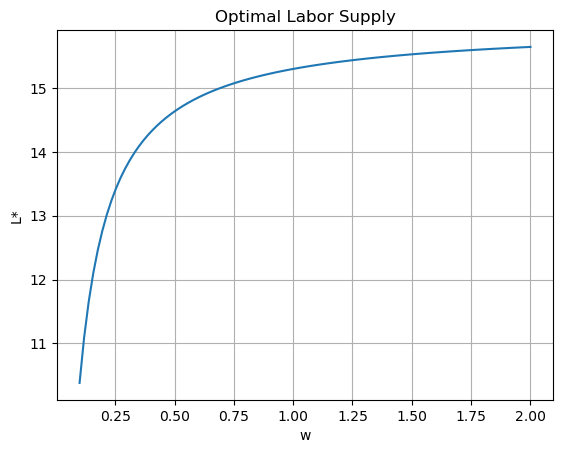

In [224]:

# Set the range for w
w_values = np.linspace(0.1, 2.0, 100)

# L* for each w value
L_star_values = []
for w in w_values:
    # Tilde(w)
    w_tilde = (1 - tau) * w

    #The optimal labor supply
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4 * (alpha / nu) * w_tilde ** 2)) / (2 * w_tilde)
    L_star_values.append(L_star)

# Plot the results
plt.plot(w_values, L_star_values)
plt.xlabel('w')
plt.ylabel('L*')
plt.title('Optimal Labor Supply')
plt.grid(True)
plt.show()


On the graph we see that L depends positively on w. We see that people work for more hours when the wage increases, but hours worked are marginally decreasing. Here we see that labour hours increase alot when the wage up 0.5 , and after that it takes a bigger wage increase for people to work more hours.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


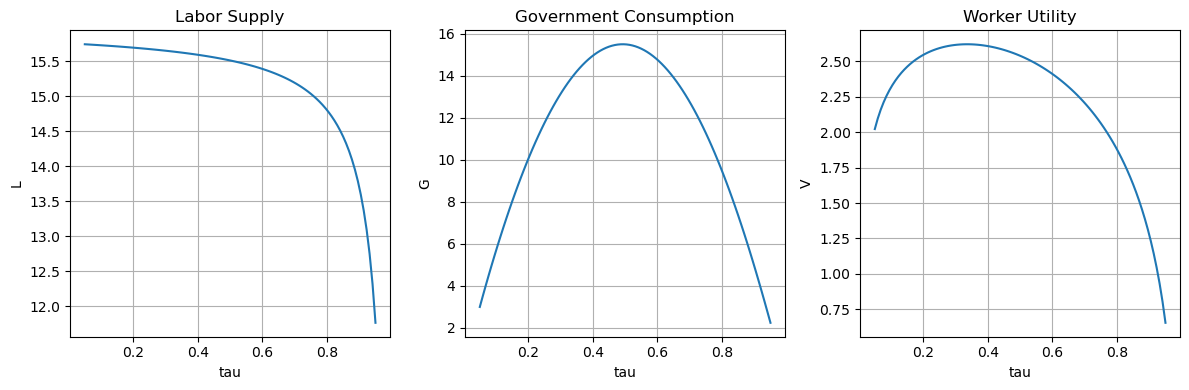

In [225]:
# Range of tau 
tau_values = np.linspace(0.05, 0.95, 100) 

# Initialize arrays to store results
L_values = []
G_values = []
V_values = []

# Calculate L, G, and V for each tau value
for tau in tau_values:
    # Calculate tilde(w)
    w_tilde = (1 - tau) * w
    
    # Calculate the optimal labor supply
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4 * (alpha / nu) * w_tilde ** 2)) / (2 * w_tilde)
    L_values.append(L_star)
    
    # Calculate government consumption
    G = tau * w * L_star*((1-tau)*w)
    G_values.append(G)
    
    # Calculate worker utility
    C = kappa + (1 - tau) * w * L_star
    V = np.log(C ** alpha * G ** (1 - alpha)) - nu * ((L_star ** 2) / 2)
    V_values.append(V)
#making the plot of the results
# Plot the results
plt.figure(figsize=(12, 4))

# Plot labor supply
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('tau')
plt.ylabel('L')
plt.title('Labor Supply')
plt.grid(True)

# Plot government consumption
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('tau')
plt.ylabel('G')
plt.title('Government Consumption')
plt.grid(True)

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, V_values)
plt.xlabel('tau')
plt.ylabel('V')
plt.title('Worker Utility')
plt.grid(True)

plt.tight_layout()
plt.show()


##### Graph for Labor Supply 
Here we see that labor hours decreases as the tax increases. This is because the employer will get a smaller and smaller share of their wage. Therefore their incentive to work decreases with the tax increase. 

##### Graph for Government Consumption
Here we see that when the tax increases the government consumption increases up to a tau value around 0,5, and for at tau value bigger than 0,5 the government conniption decreases. This can be explained by the labor supply graph, where we see that the labor supply decreases, which means that the government gets a smaller income from taxes, which leads to a smaller government consumption.

##### Graph for Worker Utility 
We see that worker utility increases for a tau value up to around 0,3, and for a bigger tau value the worker utility decreases. This can again be explained by the worker getting a smaller share of their income as the tax increases, which means that their utility decreases with a tax increase.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [226]:
# Range of tau
tau_values = np.linspace(0.05, 0.95, 100)  
# Initialize variables
V_max = -np.inf
tau_star = None

# Calculate worker utility and find the max
for tau in tau_values:
    # Calculate tilde(w)
    w_tilde = (1 - tau) * w
    
    # Calculate the optimal labor supply
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4 * (alpha / nu) * w_tilde ** 2)) / (2 * w_tilde)
    
    # Calculate government consumption
    G = tau * w * L_star*((1-tau)*w)
    
    # Calculate worker utility
    C = kappa + (1 - tau) * w * L_star
    V = np.log(C ** alpha * G ** (1 - alpha)) - nu * ((L_star ** 2) / 2)
    
    # Update maximum utility and optimal tau
    if V > V_max:
        V_max = V
        tau_star = tau

#  The result
print(f"The socially optimal tax rate τ*: {tau_star:.2f}")


The socially optimal tax rate τ*: 0.33


This value of tau is consistent with the graph for Worker Utility. 

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

We can see that $\sigma$ and $\rho$ affect G negatively.

In [227]:
from scipy.optimize import fsolve

# Optimal tax rate from question 4
tau_star = 0.33

# Define the function to solve
def solve_G(G, tau):
    w_tilde = (1 - tau) * w
    
    # Define the function for the optimal labor supply
    def labor_supply(L):
        return ((((alpha * (kappa + (1 - tau) * w * L) ** ((sigma - 1) / sigma) +
                (1 - alpha) * G ** (sigma / (sigma - 1))) ** (sigma / (sigma - 1)))**(1 - rho)) - 1) / (1-rho) - nu * (L ** (1 + epsilon) / (1 + epsilon))
    
    # Solve for the optimal labor supply L_star
    L_star = fsolve(labor_supply, 10)[0]
    
    # Calculate the implied G
    implied_G = tau * w * L_star*((1-tau)*w)
    
    return implied_G - G

# Set 1 parameters
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0

# Set 2 parameters
sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# Calculate G for set 1
sigma = sigma_set1
rho = rho_set1
epsilon = epsilon_set1

# Solve for G using fsolve
G_solution_set1 = fsolve(solve_G, 1.0, args=(tau_star,))

# Calculate G for set 2
sigma = sigma_set2
rho = rho_set2
epsilon = epsilon_set2

# Solve for G using fsolve
G_solution_set2 = fsolve(solve_G, 1.0, args=(tau_star,))

# Print the results
print(f"For Set 1: G = {G_solution_set1[0]:.3f}")
print(f"For Set 2: G = {G_solution_set2[0]:.3f}")


For Set 1: G = 1.000
For Set 2: G = 1.170


C:\Users\Bruger\AppData\Local\Temp\ipykernel_15424\1282166850.py:12: RuntimeWarning: invalid value encountered in power
  return ((((alpha * (kappa + (1 - tau) * w * L) ** ((sigma - 1) / sigma) +
c:\Users\Bruger\anaconda3\Ny mappe\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_15424\1282166850.py:13: RuntimeWarning: overflow encountered in power
  (1 - alpha) * G ** (sigma / (sigma - 1))) ** (sigma / (sigma - 1)))**(1 - rho)) - 1) / (1-rho) - nu * (L ** (1 + epsilon) / (1 + epsilon))
C:\Users\Bruger\AppData\Local\Temp\ipykernel_15424\1282166850.py:12: RuntimeWarning: overflow encountered in power
  return ((((alpha * (kappa + (1 - tau) * w * L) ** ((sigma - 1) / sigma) +
c:\Users\Bruger\anaconda3\Ny mappe\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The i

We see that as sigma and rho increases G increases.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [228]:
from scipy.optimize import minimize_scalar

# Utility function
def utility(tau, sigma, rho, epsilon, alpha, kappa, nu, w):
    # Labor supply function
    def labor_supply(L):
        C = kappa + (1 - tau) * w * L
        G = tau * w * L*((1-tau)*w)
        return ((((alpha * C ** ((sigma - 1) / sigma) +
                (1 - alpha) * G ** (sigma / (sigma - 1))) ** (sigma / (sigma - 1)))**(1 - rho)) - 1) / (1-rho) - nu * (L ** (1 + epsilon) / (1 + epsilon))

    result = minimize_scalar(lambda L: -labor_supply(L), bounds=(0, 24), method='bounded')
    if result.success:
        L_star = result.x
        G_star = tau * w * L*((1-tau)*w)
        return labor_supply(L_star), L_star, G_star
    else:
        raise ValueError("Optimization failed.")

# Baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0

# Set 1 parameters
sigma1 = 1.001
rho1 = 1.001
epsilon1 = 1.0

# Solve for socially optimal tax rate for Set 1
result_set1 = minimize_scalar(lambda tau: -utility(tau, sigma1, rho1, epsilon1, alpha, kappa, nu, w)[0], bounds=(0, 1), method='bounded')
tau_star_set1 = result_set1.x
utility_set1, L_star_set1, G_star_set1 = utility(tau_star_set1, sigma1, rho1, epsilon1, alpha, kappa, nu, w)

# Set 2 parameters
sigma2 = 1.5
rho2 = 1.5
epsilon2 = 1.0

# Solve for socially optimal tax rate for Set 2
result_set2 = minimize_scalar(lambda tau: -utility(tau, sigma2, rho2, epsilon2, alpha, kappa, nu, w)[0], bounds=(0, 1), method='bounded')
tau_star_set2 = result_set2.x
utility_set2, L_star_set2, G_star_set2 = utility(tau_star_set2, sigma2, rho2, epsilon2, alpha, kappa, nu, w)

print("Set 1:")
print("Socially Optimal Tax Rate (τ*):", tau_star_set1)
print("Worker Utility:", utility_set1)

print("\nSet 2:")
print("Socially Optimal Tax Rate (τ*):", tau_star_set2)
print("Worker Utility:", utility_set2)


Set 1:
Socially Optimal Tax Rate (τ*): 0.4998484913858866
Worker Utility: 999.9843400059689

Set 2:
Socially Optimal Tax Rate (τ*): 0.4978227342887012
Worker Utility: 1.829528477141957


C:\Users\Bruger\AppData\Local\Temp\ipykernel_15424\1048021157.py:10: RuntimeWarning: overflow encountered in double_scalars
  (1 - alpha) * G ** (sigma / (sigma - 1))) ** (sigma / (sigma - 1)))**(1 - rho)) - 1) / (1-rho) - nu * (L ** (1 + epsilon) / (1 + epsilon))
C:\Users\Bruger\AppData\Local\Temp\ipykernel_15424\1048021157.py:9: RuntimeWarning: overflow encountered in double_scalars
  return ((((alpha * C ** ((sigma - 1) / sigma) +


The tax socially optimal tax rate is a bit bigger for set 1, from where we can tell that sigma and rho affects the tax rate negatively.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [229]:
w,eta,kappa,l_t, p_t, y_t=sm.symbols('w eta kappa l_t p_t y_t')

In [230]:
def solow_l_function(w: float, eta:float, l_t: float, p_t:float, y_t: float) -> float:
    #Returning transition equation for physical capital:

    return (((1-eta)*kappa)/w)**(1/eta)

In [231]:
func = lambda x: [solow_l_function(x[1],w,eta,l_t,p_t,y_t,x[0])]


In [232]:
#Define the paramters 
kappas=[1.0,2.0]
eta=0.5
w=1.0

In [233]:
#Find the optimal 
for kappa in kappas:
    ell=((1-eta)*kappa/w)**(1/eta)
    p=kappa*l**(1-eta)-w*l
    print(f"Kappa = {kappa}:")
    print(f"optimal level of l_t: {ell}")
    print(f"max profit: {p}\n")

Kappa = 1.0:
optimal level of l_t: 0.25
max profit: 0.0

Kappa = 2.0:
optimal level of l_t: 1.0
max profit: 1.0



It is higher for kappa = 2 because kappa have a positive effekt on l_t

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [234]:
#define the parameters in the model  
eta=0.5
w=1.0
rho=0.9
iota=0.01
sigma_epsilon=0.1
R=(1+0.01)**(1/12)
T=120
K=10000

Now we can start define the function h and we have set K to a value

In [235]:
def calculate_h(shocks):
    kappa=np.zeros(T)
    ell=np.zeros(T)
    profit=np.zeros(T)
    h_value=0.0
    
    for t in range(T):
        if t==0:
            kappa[t]=np.exp(-0.5*sigma_epsilon**2+shocks[t])
        else :
            kappa[t]=np.exp(rho*np.log(kappa[t-1])+shocks[t])
                            
        ell[t]=((1-eta)*kappa[t]/[w])**(1/eta)
        profit[t]=kappa[t]*ell[t]**(1-eta)-w*ell[t]
        if t>0 and ell[t]!=ell[t-1]:
            profit[t]-=iota
        h_value += R**(-t)*profit[t]
    return h_value

In [236]:
# Now we look at number of shock series

np.random.seed(0)
shock_series = np.random.normal(-0.5*sigma_epsilon**2,sigma_epsilon, size=(K,T))

Now we will calculate the expected value of the salon 

In [237]:
# Find the value of H
H=np. mean([calculate_h(shocks) for shocks in shock_series])
print([H])

[27.725552255745804]


We have calculate the H value to 27.73. If we choose a large value for K we get a more precise approximation for our expected value. 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

Now we will calculate H with policies and the shocks series and we will hold Delta =  0.05

In [238]:
# Define the value of Delta
delta =0.05

In [239]:
# define the value of h give the value of Delta and policies

def calculate_h(shocks, delta):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])
        
        ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)

        if t > 0 and abs(ell[t - 1] - ell_star) > delta:
            ell[t] = ell_star
        else:
            ell[t] = ell[t - 1]

        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value


As we did in the last question we will simulate the series of shocks to the new policies

In [240]:
#shock series
np.random.seed(0)
shock_series=np.random.normal(-0.5*sigma_epsilon**2,sigma_epsilon, size = (K,T))

Agian we will find the value of H and after we wil compare it to the value we got in question 2

In [241]:
# finde the new H
H_policy= np.mean([calculate_h(shocks, delta) for shocks in shock_series])

#profitability improvment to the other value of H
improvement_1= H_policy -H

print({H_policy})
print({improvement_1})

{28.149628094339143}
{0.42407583859333897}


With the value of $\Delta=0.05$ we have H to 28.15 and we have an imporvement in protability on 0.42. os if we compared to the value we found in when $\Delta=0$. We have improve that the new policy is a substantailly and the profitability is improved.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [242]:
from scipy.optimize import minimize_scalar
K = 100

#Define the function for h includning the shock series and policy
def calculate_h(shocks, delta):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])

        ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)

        if t > 0 and abs(ell[t - 1] - ell_star) > delta:
            ell[t] = ell_star
        else:
            ell[t] = ell[t - 1]

        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value

# For Maximize the function we use the object function
def objective(delta):
    np.random.seed(0)
    shock_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))
    h_values = [calculate_h(shocks, delta) for shocks in shock_series]
    return -np.mean(h_values)

# Find the optimal delta
result = minimize_scalar(objective, bounds=(0, 0.1), method='bounded')
optimal_delta = result.x
optimal_H = -result.fun

print(f"Optimal Delta: {optimal_delta}")
print(f"Optimal H: {optimal_H}")

Optimal Delta: 0.07551138070972771
Optimal H: 27.129721409984377


In [243]:
# define values of Delta and 
delta_V= np.linspace(0,0.1,100)
H_V=[-objective(delta) for delta in delta_V]

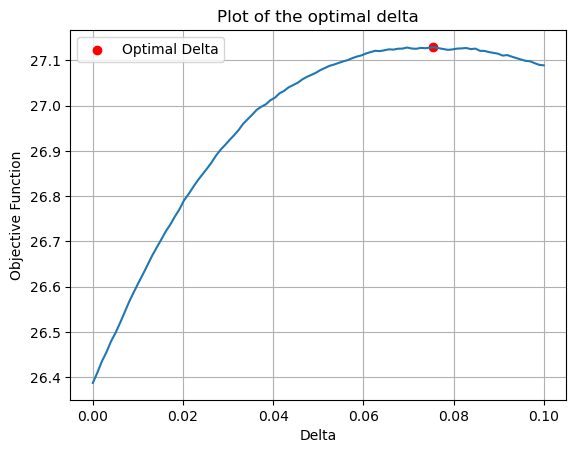

Optimal Delta: 0.07551138070972771
Optimal H: 27.129721409984377


In [244]:
#Plot
plt.plot(delta_V, H_V)
plt.scatter(optimal_delta, optimal_H, color='red', label='Optimal Delta')
plt.xlabel('Delta')
plt.ylabel('Objective Function')
plt.title('Plot of the optimal delta')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal Delta: {optimal_delta}")
print(f"Optimal H: {optimal_H}")

On the firgue we can see the optimal Delta plottet agianst the H value. We also found the optimal $\Delta$=0.0755 and the optimal H=27.1297


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



An alternative policy would possibly be to improve profits by adjusting the number of hairdressers. We willl based it on the current demand shock but also demand shock from the past.

We use folowing equation to adjust the number of hairdressers
$l_t=(1-\gamma) \cdot l_{(t-1)}+\gamma \cdot l_t^*$ and we use $l_{t}^*$

First we define the parameters in our alternative policy

In [245]:
#define parameers
n=12
gamma=0.1
K=1000

We use the same procedure as before to find the value of H

In [246]:

# Function to calculate h given shock series and alternative policy
def calculate_h(shocks, gamma, n):
    kappa = np.zeros(T)
    ell = np.zeros(T)
    profit = np.zeros(T)
    h_value = 0.0

    for t in range(T):
        if t == 0:
            kappa[t] = np.exp(-0.5 * sigma_epsilon ** 2 + shocks[t])
        else:
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + shocks[t])

        if t >= n:
            average_kappa = np.mean(kappa[t - n + 1 : t + 1])
        else:
            average_kappa = np.mean(kappa[:t + 1])

        ell_star = ((1 - eta) * average_kappa / w) ** (1 / eta)
        ell[t] = (1 - gamma) * ell[t - 1] + gamma * ell_star

        profit[t] = kappa[t] * ell[t] ** (1 - eta) - w * ell[t]

        if t > 0 and ell[t] != ell[t - 1]:
            profit[t] -= iota

        h_value += R ** (-t) * profit[t]

    return h_value

# Simulate shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))

# Calculate H with alternative policy
H_alternative_policy = np.mean([calculate_h(shocks, gamma, n) for shocks in shock_series])



In [247]:
# Compare profitability and print the value of H in  the alternative model
improvement_2 = H_alternative_policy - H
improvment_3 = H_alternative_policy - H_policy

print(f"H Alternative: {H_alternative_policy}")
print({improvement_2})
print({improvment_3})

H Alternative: 26.231949369682592
{-1.4936028860632113}
{-1.9176787246565503}


We use our altnative policy over a large number of shocks. We see can that we get a value of the salon to 26,13. We compare this value to the value of to question 1 and 2. We can see value of H i bigger in question 1 and 2.  

We can conclude that the alternative policy does not improve the profitability.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [248]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

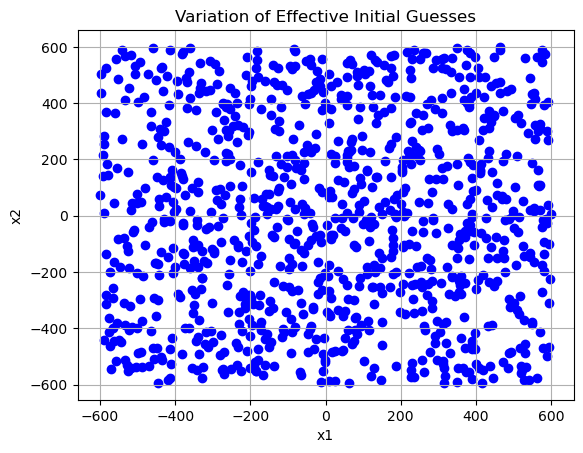

In [249]:
from scipy.optimize import minimize

def griewank(x):
    return griewank_(x[0], x[1])
    
def griewank_(x1, x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1)) * np.cos(x2/np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    x_best = None
    f_best = None
    
    for k in range(max_iterations):
        # Step 3.A
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        # Step 3.B 
        if k >= warmup_iterations:
            # Step 3.C
            chi_k = 0.50 * 2 / (1 + np.exp((k - warmup_iterations) / 100))
            #Step 3.D
            x_k0 = chi_k * x_k + (1 - chi_k) * x_best
            # Step 3.E
            result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
            x_k_star = result.x
            f_k_star = result.fun
            
            # Step 3.F
            if x_best is None or f_k_star < f_best:
                x_best = x_k_star
                f_best = f_k_star
            
            # Step 3.G
            if f_best < tolerance:
                break
    # Step 4
    return x_best

# Step 1 
# Step 2
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Running the optimizer
results = []
for k in range(max_iterations):
    x_k = np.random.uniform(bounds[0], bounds[1], size=2)
    results.append(x_k)

# Plotting the variation of effective initial guesses
import matplotlib.pyplot as plt

x_values = [x[0] for x in results]
y_values = [x[1] for x in results]

plt.scatter(x_values, y_values, c='blue', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Variation of Effective Initial Guesses')
plt.grid(True)
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

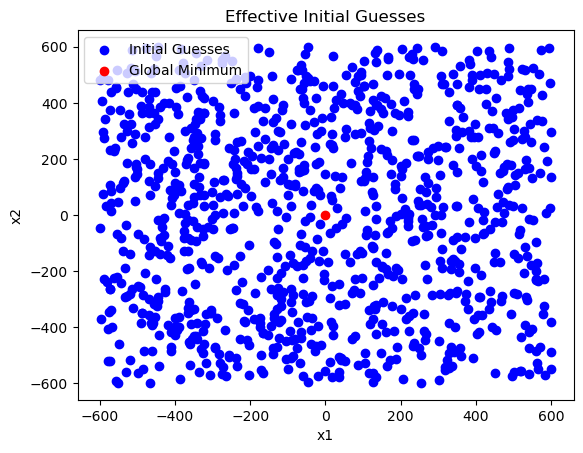

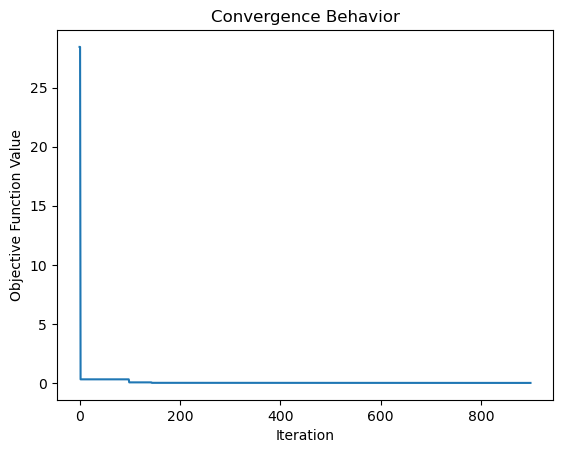

In [250]:
from scipy.optimize import minimize, Bounds

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    x_best = None
    f_best = np.inf
    # Initialize with a valid value
    x_ast = np.random.uniform(bounds[0], bounds[1], 2)  
    
    x0_values = []
    f_values = []
    
    for k in range(K_max):
        # Step 3.A
        x_k = np.random.uniform(bounds[0], bounds[1], 2)
        x0_values.append(x_k)
        
        # Step 3.B 
        if k < K_warmup:
            continue
        
        # Step 3.C
        chi_k = 0.5 * 2 / (1 + np.exp((k - K_warmup) / 100))
        # Step 3.D
        x_k0 = chi_k * x_k + (1 - chi_k) * x_ast
        
        # Step 3.E
        res = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
        x_k_ast = res.x
        f_k_ast = res.fun
        
        # Step 3.F
        if k == K_warmup or f_k_ast < f_best:
            x_ast = x_k_ast
            f_best = f_k_ast
        
        f_values.append(f_best)
    # Step 4        
    return x_ast, x0_values, f_values

# Step 1
# Step 2
bounds = [-600, 600]
tolerance = 1e-8
K_warmup = 100
K_max = 1000

# Running the optimizer
x_ast, x0_values, f_values = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)

# Plotting the effective initial guesses
x0_values = np.array(x0_values)
plt.scatter(x0_values[:, 0], x0_values[:, 1], c='blue', label='Initial Guesses')
plt.scatter(x_ast[0], x_ast[1], c='red', label='Global Minimum')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Effective Initial Guesses')
plt.show()

# Plotting the convergence behavior
plt.plot(f_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Behavior')
plt.show()


# 3D plot

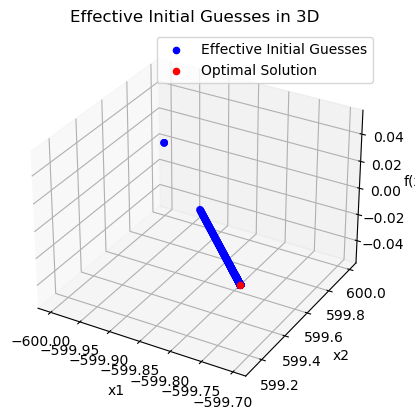

Optimal solution:
x1 = -599.7018256531367
x2 = 599.1294842683853
f(x) = 179.80828844423647


In [251]:
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

def refined_global_optimizer(bounds, tolerance, warmup_iters, max_iters):
    best_x = None
    best_f = float('inf')
     # Initial x*
    x_star = np.zeros(2) 
    x_k0_values = []

    for k in range(max_iters):
        if k >= warmup_iters:
            chi = 0.5 * (2 / (1 + np.exp((k - warmup_iters) / 100)))
            # Step 3.A
            x_k = np.random.uniform(bounds[0], bounds[1])  
            # Step 3.D
            x_k0 = chi * x_k + (1 - chi) * x_star  
        else:
            # Step 3.A
            x_k0 = np.random.uniform(bounds[0], bounds[1])  

        # Store x_k0 for plotting
        x_k0_values.append(x_k0)  

        # Step 3.E
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)  

        # Step 3.F
        if result.fun < best_f:  
            best_x = result.x
            best_f = result.fun

        x_star = best_x

        # Step 3.G
        if best_f < tolerance:  
            break

    return best_x, x_k0_values

# Step 1 
# Step 2
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iters = 10
max_iters = 1000

# Running the optimizer
x_star, x_k0_values = refined_global_optimizer(bounds, tolerance, warmup_iters, max_iters)

# Extract x1 and x2 values from x_k0_values
x_k0_values = np.array(x_k0_values)
x1_values = x_k0_values[:, 0]
x2_values = x_k0_values[:, 1]

# Plot the effective initial guesses in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_values, x2_values, np.zeros_like(x1_values), c='b', label='Effective Initial Guesses')
ax.scatter(x_star[0], x_star[1], 0, c='r', label='Optimal Solution')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Effective Initial Guesses in 3D')
ax.legend()
plt.show()

print("Optimal solution:")
print("x1 =", x_star[0])
print("x2 =", x_star[1])
print("f(x) =", griewank(x_star))


in the 3D we can se how the inital geusses distributes is and they make a straight line.The blue points  is the initial guesses and the red point optimal minima of the the Griewank function.

# Comparing convergence 

Best Solution (num_warmup = 10): [-5.37295578e-09 -7.88190099e-09]
Best Solution (num_warmup = 100): [-9.84921702e-10 -1.15377597e-08]


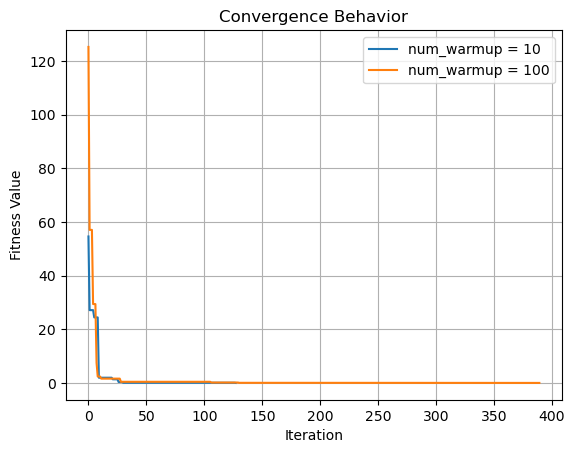

In [254]:

def refined_global_optimizer(bounds, tolerance, num_warmup, max_iterations):
    best_solution = None
    best_fitness = np.inf
    convergence_iterations = []

    for k in range(max_iterations):
        x0 = np.random.uniform(bounds[0], bounds[1], size=(2,))

        if k >= num_warmup:
            chi_k = 0.50 * (2 / (1 + np.exp((k - num_warmup) / 100)))
            x0 = chi_k * x0 + (1 - chi_k) * best_solution

        result = minimize(griewank, x0, method='BFGS', tol=tolerance)
        x_k_ast = result.x
        f_k_ast = result.fun

        if k == 0 or f_k_ast < best_fitness:
            best_solution = x_k_ast
            best_fitness = f_k_ast

        convergence_iterations.append(best_fitness)

        if best_fitness < tolerance:
            break

    return best_solution, convergence_iterations

# Settings
bounds = [-600, 600]
tolerance = 1e-8
num_warmup_10 = 10
num_warmup_100 = 100
max_iterations = 1000

# Run the optimizer for num_warmup = 10
best_solution_10, convergence_iterations_10 = refined_global_optimizer(bounds, tolerance, num_warmup_10, max_iterations)

# Run the optimizer for num_warmup = 100
best_solution_100, convergence_iterations_100 = refined_global_optimizer(bounds, tolerance, num_warmup_100, max_iterations)

# Print the best solutions
print("Best Solution (num_warmup = 10):", best_solution_10)
print("Best Solution (num_warmup = 100):", best_solution_100)

# Plot the convergence behavior
import matplotlib.pyplot as plt

plt.plot(range(len(convergence_iterations_10)), convergence_iterations_10, label='num_warmup = 10')
plt.plot(range(len(convergence_iterations_100)), convergence_iterations_100, label='num_warmup = 100')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')
plt.title('Convergence Behavior')
plt.legend()
plt.grid(True)
plt.show()


A larger value of $\underline{K}$ allows for more warm-up iterations, which helps to explore the search space and potentially find better initial solutions. This increased exploration in the early iterations can improve the chances of finding the global minimum faster. 

From the figure we can see how the function converge with $\underline{K}$ =10 and with $\underline{K}$ =100.